In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rrt_star import RRTStarDubins
import time

In [2]:
obstacleList = [
    [-5.6749, 1.20558, 0.521155],
    [-3.42783, -2.3167, 0.620818],
    [2.07, 5.36304, 0.534224],
    [-2.02172, -3.82217, 0.462809],
    [1.09052, -0.990239, 0.644405],
    [-4, 6.92, 0.01],
    [-4, 6.92, 0.01],
    [-3.6, 6.92, 0.01],
    [-3.2, 6.92, 0.01],
    [-2.8, 6.92, 0.01],
    [-2.4, 6.92, 0.01],
    [-2, 6.92, 0.01],
    [-1.6, 6.92, 0.01],
    [-1.2, 6.92, 0.01],
    [-0.8, 6.92, 0.01],
    [-0.4, 6.92, 0.01],
    [0, 6.92, 0.01],
    [0.4, 6.92, 0.01],
    [0.8, 6.92, 0.01],
    [1.2, 6.92, 0.01],
    [1.6, 6.92, 0.01],
    [2, 6.92, 0.01],
    [2.4, 6.92, 0.01],
    [2.8, 6.92, 0.01],
    [3.2, 6.92, 0.01],
    [3.6, 6.92, 0.01],
    [4, 6.92, 0.01],
    [4.2, 6.574, 0.01],
    [4.4, 6.228, 0.01],
    [4.6, 5.882, 0.01],
    [4.8, 5.536, 0.01],
    [5, 5.19, 0.01],
    [5.2, 4.844, 0.01],
    [5.4, 4.498, 0.01],
    [5.6, 4.152, 0.01],
    [5.8, 3.806, 0.01],
    [6, 3.46, 0.01],
    [6.2, 3.114, 0.01],
    [6.4, 2.768, 0.01],
    [6.6, 2.422, 0.01],
    [6.8, 2.076, 0.01],
    [7, 1.73, 0.01],
    [7.2, 1.384, 0.01],
    [7.4, 1.038, 0.01],
    [7.6, 0.692, 0.01],
    [7.8, 0.346, 0.01],
    [8, 0, 0.01],
    [7.8, -0.346, 0.01],
    [7.6, -0.692, 0.01],
    [7.4, -1.038, 0.01],
    [7.2, -1.384, 0.01],
    [7, -1.73, 0.01],
    [6.8, -2.076, 0.01],
    [6.6, -2.422, 0.01],
    [6.4, -2.768, 0.01],
    [6.2, -3.114, 0.01],
    [6, -3.46, 0.01],
    [5.8, -3.806, 0.01],
    [5.6, -4.152, 0.01],
    [5.4, -4.498, 0.01],
    [5.2, -4.844, 0.01],
    [5, -5.19, 0.01],
    [4.8, -5.536, 0.01],
    [4.6, -5.882, 0.01],
    [4.4, -6.228, 0.01],
    [4.2, -6.574, 0.01],
    [4, -6.92, 0.01],
    [3.6, -6.92, 0.01],
    [3.2, -6.92, 0.01],
    [2.8, -6.92, 0.01],
    [2.4, -6.92, 0.01],
    [2, -6.92, 0.01],
    [1.6, -6.92, 0.01],
    [1.2, -6.92, 0.01],
    [0.8, -6.92, 0.01],
    [0.4, -6.92, 0.01],
    [0, -6.92, 0.01],
    [-0.4, -6.92, 0.01],
    [-0.8, -6.92, 0.01],
    [-1.2, -6.92, 0.01],
    [-1.6, -6.92, 0.01],
    [-2, -6.92, 0.01],
    [-2.4, -6.92, 0.01],
    [-2.8, -6.92, 0.01],
    [-3.2, -6.92, 0.01],
    [-3.6, -6.92, 0.01],
    [-4, -6.92, 0.01],
    [-4.2, -6.574, 0.01],
    [-4.4, -6.228, 0.01],
    [-4.6, -5.882, 0.01],
    [-4.8, -5.536, 0.01],
    [-5, -5.19, 0.01],
    [-5.2, -4.844, 0.01],
    [-5.4, -4.498, 0.01],
    [-5.6, -4.152, 0.01],
    [-5.8, -3.806, 0.01],
    [-6, -3.46, 0.01],
    [-6.2, -3.114, 0.01],
    [-6.4, -2.768, 0.01],
    [-6.6, -2.422, 0.01],
    [-6.8, -2.076, 0.01],
    [-7, -1.73, 0.01],
    [-7.2, -1.384, 0.01],
    [-7.4, -1.038, 0.01],
    [-7.6, -0.692, 0.01],
    [-7.8, -0.346, 0.01],
    [-8, 0, 0.01],
    [-7.8, 0.346, 0.01],
    [-7.6, 0.692, 0.01], [-7.4, 1.038, 0.01],
    [-7.2, 1.384, 0.01],
    [-7, 1.73, 0.01],
    [-6.8, 2.076, 0.01],
    [-6.6, 2.422, 0.01],
    [-6.4, 2.768, 0.01],
    [-6.2, 3.114, 0.01],
    [-6, 3.46, 0.01],
    [-5.8, 3.806, 0.01],
    [-5.6, 4.152, 0.01],
    [-5.4, 4.498, 0.01],
    [-5.2, 4.844, 0.01],
    [-5, 5.19, 0.01],
    [-4.8, 5.536, 0.01],
    [-4.6, 5.882, 0.01],
    [-4.4, 6.228, 0.01],
    [-4.2, 6.574, 0.01],
]

In [3]:
obstacleList = np.array(obstacleList)

In [4]:
rnd_min = -10
rnd_max = 10

In [5]:
# Shelfino 0
start = [0, 2, np.deg2rad(0.0)]
goal = [0.18, -6.42, np.deg2rad(-90)]


shelfino0_rrt = RRTStarDubins(start, goal, rand_area=[
    rnd_min, rnd_max], obstacle_list=obstacleList, robot_radius=0.5)

shelfino0_path = np.array(shelfino0_rrt.planning(
    search_until_max_iter=False))[::-1]

Iter: 0 , number of nodes: 1
Iter: 1 , number of nodes: 2
Iter: 2 , number of nodes: 3
Iter: 3 , number of nodes: 3
Iter: 4 , number of nodes: 3
Iter: 5 , number of nodes: 3
Iter: 6 , number of nodes: 3


Iter: 7 , number of nodes: 4
Iter: 8 , number of nodes: 5
Iter: 9 , number of nodes: 5
Iter: 10 , number of nodes: 5
Iter: 11 , number of nodes: 5
Iter: 12 , number of nodes: 5
Iter: 13 , number of nodes: 5
Iter: 14 , number of nodes: 5
Iter: 15 , number of nodes: 5
Iter: 16 , number of nodes: 5
Iter: 17 , number of nodes: 5
Iter: 18 , number of nodes: 6
Iter: 19 , number of nodes: 6
Iter: 20 , number of nodes: 7
Iter: 21 , number of nodes: 7
Iter: 22 , number of nodes: 7
Iter: 23 , number of nodes: 7
Iter: 24 , number of nodes: 7
Iter: 25 , number of nodes: 7
Iter: 26 , number of nodes: 7
Iter: 27 , number of nodes: 7
Iter: 28 , number of nodes: 7
Iter: 29 , number of nodes: 7
Iter: 30 , number of nodes: 7
Iter: 31 , number of nodes: 7
Iter: 32 , number of nodes: 7
Iter: 33 , number of nodes: 7
Iter: 34 , number of nodes: 7
Iter: 35 , number of nodes: 7
Iter: 36 , number of nodes: 7
Iter: 37 , number of nodes: 7
Iter: 38 , number of nodes: 7
Iter: 39 , number of nodes: 7
Iter: 40 , nu

In [6]:
# Shelfino 0
start = [2, -3, np.deg2rad(0.0)]
goal = [0.18, -6.42, np.deg2rad(-90)]


shelfino1_rrt = RRTStarDubins(start, goal, rand_area=[
    rnd_min, rnd_max], obstacle_list=obstacleList, robot_radius=0.5)

shelfino1_path = np.array(shelfino1_rrt.planning(
    search_until_max_iter=False))[::-1]

Iter: 0 , number of nodes: 1
Iter: 1 , number of nodes: 1
Iter: 2 , number of nodes: 1
Iter: 3 , number of nodes: 1
Iter: 4 , number of nodes: 1
Iter: 5 , number of nodes: 1
Iter: 6 , number of nodes: 1
Iter: 7 , number of nodes: 1
Iter: 8 , number of nodes: 1
Iter: 9 , number of nodes: 1
Iter: 10 , number of nodes: 1
Iter: 11 , number of nodes: 1
Iter: 12 , number of nodes: 1


In [7]:
# Shelfino 0
start = [-2, 0, np.deg2rad(0.0)]
goal = [0.18, -6.42, np.deg2rad(-90)]


shelfino2_rrt = RRTStarDubins(start, goal, rand_area=[
    rnd_min, rnd_max], obstacle_list=obstacleList, robot_radius=0.5)

shelfino2_path = np.array(shelfino2_rrt.planning(
    search_until_max_iter=False))[::-1]

Iter: 0 , number of nodes: 1
Iter: 1 , number of nodes: 1
Iter: 2 , number of nodes: 1
Iter: 3 , number of nodes: 1
Iter: 4 , number of nodes: 1
Iter: 5 , number of nodes: 1
Iter: 6 , number of nodes: 1
Iter: 7 , number of nodes: 1
Iter: 8 , number of nodes: 2
Iter: 9 , number of nodes: 2
Iter: 10 , number of nodes: 2


In [9]:
shelfino1_path = shelfino2_path.copy()
shelfino1_path[..., 0] = -shelfino1_path[..., 0]

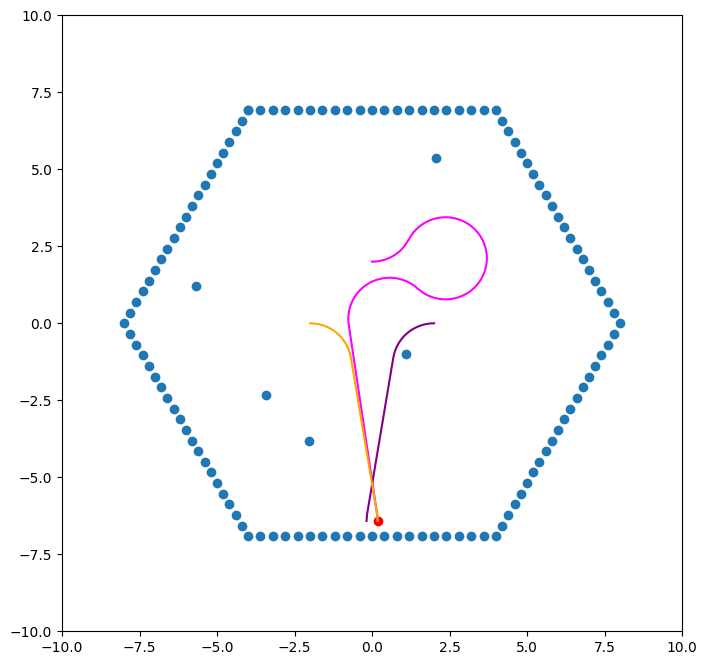

In [10]:
plt.figure(figsize=(8, 8))
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.scatter(obstacleList[..., 0], obstacleList[..., 1])
plt.scatter(goal[0], goal[1], color='red')
# path0
plt.plot([x for (x, y) in shelfino0_path], [
         y for (x, y) in shelfino0_path], color="fuchsia")
plt.plot([x for (x, y) in shelfino1_path], [
         y for (x, y) in shelfino1_path], color="purple")
plt.plot([x for (x, y) in shelfino2_path], [
         y for (x, y) in shelfino2_path], color="orange")
plt.show()

In [11]:
shelfino0_path.shape[0], shelfino1_path.shape[0], shelfino2_path.shape[0]

(132, 54, 54)

In [14]:
max_timestep = int(max(
    shelfino0_path.shape[0], shelfino1_path.shape[0], shelfino2_path.shape[0],) * 2)

In [15]:
collision_delay = 2

In [16]:
path0_delay = 0
path1_delay = 0
path2_delay = 0

In [17]:
check_collision = True

In [18]:
while check_collision:
    print("checking...")

    path0_eq = np.full((max_timestep, 2), np.nan)
    path0_eq[0:path0_delay] = shelfino0_path[0]
    path0_eq[path0_delay:shelfino0_path.shape[0]+path0_delay] = shelfino0_path

    path1_eq = np.full((max_timestep, 2), np.nan)
    path1_eq[0:path1_delay] = shelfino1_path[0]
    path1_eq[path1_delay:shelfino1_path.shape[0]+path1_delay] = shelfino1_path

    path2_eq = np.full((max_timestep, 2), np.nan)
    path2_eq[0:path2_delay] = shelfino2_path[0]
    path2_eq[path2_delay:shelfino2_path.shape[0]+path2_delay] = shelfino2_path

    dist = np.stack([
        np.linalg.norm(path0_eq-path1_eq, axis=-1),  # path0, path1
        np.linalg.norm(path0_eq-path2_eq, axis=-1),  # path0, path2
        np.linalg.norm(path1_eq-path2_eq, axis=-1)],  # path1, path2
        axis=1)

    collisions = np.where((dist < 0.35) & (dist != np.nan))

    if collisions[1].shape[0] > 0:
        collision_case = collisions[1][0]
        if collision_case == 0:  # collision between 0 and 1
            if (shelfino0_path.shape[0] < shelfino1_path.shape[0]):
                path0_delay += collision_delay
            else:
                path1_delay += collision_delay
        elif collision_case == 1:  # collision between 0 and 2
            if (shelfino0_path.shape[0] < shelfino2_path.shape[0]):
                path0_delay += collision_delay
            else:
                path2_delay += collision_delay
        elif collision_case == 2:  # collision between 1 and 2
            if (shelfino1_path.shape[0] < shelfino2_path.shape[0]):
                path1_delay += collision_delay
            else:
                path2_delay += collision_delay
    else:
        check_collision = False  # no collision founded
        print("NO collisions")

checking...
checking...
checking...
NO collisions


In [19]:
path0_delay, path1_delay, path2_delay

(0, 0, 4)

In [31]:
dist_discr = 0.1

In [32]:
vel = 0.2

In [41]:
path2_delay * 0.1 / 0.2

2.0